In [1]:
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
ckpt_file = '/home/sakshi/courses/CMSC733/sakshi_project4/Checkpoints/model-15840'
img_name = '/home/sakshi/courses/CMSC733/sakshi_project4/Data/TrainingAndValData/SfMLearnerData/2011_09_26_drive_0032_sync_02/0000000001.jpg'
fh = open(img_name, 'rb')
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

/home/sakshi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sakshi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sakshi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sakshi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: 

In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/sakshi/courses/CMSC733/sakshi_project4/Checkpoints/model-15840


Populating the interactive namespace from numpy and matplotlib


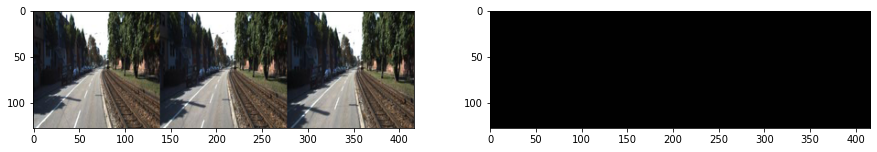

In [12]:
%pylab inline
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow((normalize_depth_for_display(pred['depth'][0,:,:,0])))

In [14]:
normalize_depth_for_display(pred['depth'][0,:,:,0])*255

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2